![](https://projectvirtual.eu/wp-content/uploads/2018/07/cropped-Vitrtual_logo_RGB_WT.png)


# Jupyter Notebook

The following Jupyter notebook was implemented to evaluate the simulated results of the current VIVA+ model.  


### Python packages

The jupyter notebook uses the following python packages: 

* `os`
* `numpy`
* `matplotlib`
* `dynasaur`

If you have followed the [installation guide](https://gitlab.com/VSI-TUGraz/Dynasaur/-/wikis/Installation), all required packages should be installed. 


### Dynasaur

Dynasaur is a Python packages, developed to postprocess large (binary) result files from FE simulations. Dynasaur is published under GPLv3, model specific input and output files underlay however the license conditions of the model itself. The FE Code specific input reader is currently available for output files created with LS-DYNA, input routines for other codes are in progress.

The library was designed to extract major quantities from FE simulation results in an easy manner. Therefore, two [controller classes](https://gitlab.com/VSI-TUGraz/Dynasaur/-/wikis/installation/Assessment-Controller) have been developed:
* *DataVisualizationController*
* *CriteriaController*

![dynasaur_architecture](https://gitlab.com/VSI-TUGraz/Dynasaur/-/wikis/uploads/7999cfa22789fe6485e33ef2370674ed/dynasaur_architecture.png)

Throughout this notebook, we will show how to use the controller classes.


If you have installed all requirements, the following cell should be executable without errors.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from dynasaur.plugins.data_visualization_controller import DataVisualizationController
from dynasaur.plugins.criteria_controller import CriteriaController


# Dynasaur controller classes 

The two classes *CriteriaController* and *DataVisualizationController* build the main interface for the assessment. Both controller are similar in terms of their usage. Their initialization requires the data file location, and two [definition files](https://gitlab.com/VSI-TUGraz/Dynasaur/-/wikis/Definition-Files), containing model IDs and calculation procedures.

In the next cell the *DataVisualizationController* is instantiated to visualize time history data. In addition, an `output` directory is created to which the extracted data is written.


In [2]:
#Auxilaries - where are your definition files located?
input_dir = os.path.join(os.getcwd(),"Auxilaries")
path_to_def = os.path.join(input_dir, "Calculation_procedures.def")
path_to_def_id = os.path.join(input_dir, "Objects.def")

#Simulation Results - which simulation do you want to analyse?
path_to_data = os.path.join(os.getcwd(),"Exemplary_simulation_results", "Viano_Pelvis_HS")
outputfiles = os.path.join(path_to_data,"binout*")

data_vis_controller = DataVisualizationController(calculation_procedure_def_file=path_to_def,
                                                  object_def_file=path_to_def_id,
                                                  data_source=outputfiles)

#Output Directory - where should resuls from analysis be stored?
output_dir = os.path.join(path_to_data,"Output")
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

[READ DYNASAUR DEF]	read C:\Users\klugcor\Documents\Open_VT\intro_exercis\intro-exercise\Postprocessing\Auxilaries\Calculation_Procedures.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read C:\Users\klugcor\Documents\Open_VT\intro_exercis\intro-exercise\Postprocessing\Auxilaries\Objects.def
[READ DYNASAUR DEF]	done
[READ BINOUT]	read nodout data ...
[READ BINOUT]	done reading nodout!
[READ BINOUT]	read rcforc data ...
[READ BINOUT]	done reading rcforc!
[READ BINOUT]	read glstat data ...
[READ BINOUT]	done reading glstat!


# Extracting data with the DataVisualizationController

In order to specify what should be extracted, the [corresponding identifier of the data visualization routines](https://gitlab.com/VSI-TUGraz/Dynasaur/-/wikis/Definition-Files) have to be used. 
Therefore, the input of the controller's `calculate(command)` function requires a python dictionary, containing the following parameter:
* `visualization` : Corresponding ID in the calculation procedure definition file 
* `x_label` 
* `y_label`

In the following, a calculation example is given:

```
   data_vis_controller.calculate({'visualization': 'IMPACTOR_Contactforce-Impactor-to-HBM-m', 
                                  'x_label': 'time[ms]', 
                                  'y_label': 'x_vel'})
```


The following cell extracts multiple data channels.


In [3]:
commands = [
    {'visualization': 'IMPACTOR_Contactforce-Impactor-to-HBM-m', 'x_label': 'Time[ms]', 'y_label': 'Contact Force [kN]'},
    {'visualization': "IMPACTOR_Impactor_disp_x", 'x_label': 'Time[ms]', 'y_label': 'Displacement [mm]'},
    {'visualization': "IMPACTOR_Impactor_acc_x", 'x_label': 'Time[ms]', 'y_label': 'Accleration [mm/ms^2]'},
    {'visualization': "IMPACTOR_Impactor_acc_x_filter", 'x_label': 'Time[ms]', 'y_label': 'Accleration [mm/ms^2]'},
    {'visualization': 'MODEL_Hourglass_Energy', 'x_label': 'Time[ms]', 'y_label': 'Energy [J]'},
    {'visualization': 'MODEL_Added_Mass', 'x_label': 'Time[ms]', 'y_label': 'Mass [kg]'},
    {'visualization': 'MODEL_Total_Energy', 'x_label': 'Time[ms]', 'y_label': 'Energy [J]'},
    {'visualization': 'MODEL_Internal_Energy', 'x_label': 'Time[ms]', 'y_label': 'Energy [J]'},
    {'visualization': 'MODEL_Kinetic_Energy', 'x_label': 'Time[ms]', 'y_label': 'Energy [J]'}]
        
for command in commands:
    data_vis_controller.calculate(command)

[DATA]	read id 9900011m from channel name: x_force
[DATA]	read id 9900011m from channel name: y_force
[DATA]	read id 9900011m from channel name: z_force
[DATA]	read id 90001801 from channel name: x_displacement
[DATA]	read id 90001801 from channel name: x_acceleration
[DATA]	read id 90001801 from channel name: x_acceleration


C:\Users\klugcor\AppData\Local\Continuum\anaconda3\envs\dynasaur\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy


The CriteriaController object has a method `get_data()`, with which data can be extracted from assigned objects.  

#### Simulation Time

In [4]:
time_ = data_vis_controller.get_data('IMPACTOR', 'Impactor_acc_x')['X']

print("The simulated time from the selected output ranges from {} to {} ms".format(time_[0], time_[-1])) 

The simulated time from the selected output ranges from 0.0 to 99.9 ms


### Plotting Data

The extracted data can be plotted within your notebook. `matplotlib` is used to visualize the results.

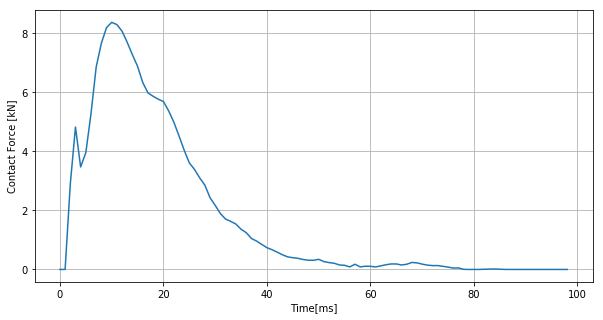

In [5]:
time_ = data_vis_controller.get_data('IMPACTOR', 'Contactforce-Impactor-to-HBM-m')['X']
x_label = data_vis_controller.get_data('IMPACTOR', 'Contactforce-Impactor-to-HBM-m')['x_name']

contact_force = data_vis_controller.get_data('IMPACTOR', 'Contactforce-Impactor-to-HBM-m')['Y']
y_label = data_vis_controller.get_data('IMPACTOR', 'Contactforce-Impactor-to-HBM-m')['y_name']

plt.figure(figsize=(10,5))
plt.plot(time_, contact_force)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid()
plt.show()

A further option is to use the method `write_csv(self, directory, filename)` which writes the extracted data to a csv file.

In [6]:
data_vis_controller.write_CSV(output_dir)

[SCRIPT]	DATA VISUALIZATION writing csv to C:\Users\klugcor\Documents\Open_VT\intro_exercis\intro-exercise\Postprocessing\Exemplary_simulation_results\Viano_Pelvis_HS\Output
[SCRIPT]	DATA VISUALIZATION done writing csv to C:\Users\klugcor\Documents\Open_VT\intro_exercis\intro-exercise\Postprocessing\Exemplary_simulation_results\Viano_Pelvis_HS\Output\DATA VISUALIZATION_2020-08-23-17-51-29.csv


# Evaluate simulated results

The following section includes an example for a validation report. The simulated outputs are compared to the references from PMHS tests reported by Viano et al., 1989 [1]
The reference values from the paper were digitalised and are incuded in the package.
The exemplary simulation files you have received represent an impact with the pendulum in the hip area at 9.8 m/s. The data corresponds to the unnormalised corridors, which are presented in Figure 8 of the paper [1] as "Pelvis" impacts.

[1] Viano, D.C. (1989), “Biomechanical Responses and Injuries in Blunt Lateral Impact”, 33rd Stapp Car Crash Conference Proceedings, 4.10.1989, SAE International.


In [7]:
#import Corridors from csv file

Reference_data = np.genfromtxt(os.path.join(input_dir, "Pelvis.csv"), delimiter=';')

#Speed1:
Ref_defl_HS=Reference_data[:,1]
Ref_CF_d_HS=Reference_data[:,0]

Ref_time_HS=Reference_data[:,3]
Ref_CF_t_HS=Reference_data[:,2]

#Speed2:
Ref_defl_HS=Reference_data[:,5]
Ref_CF_d_HS=Reference_data[:,4]

Ref_time_HS=Reference_data[:,7]
Ref_CF_t_HS=Reference_data[:,6]



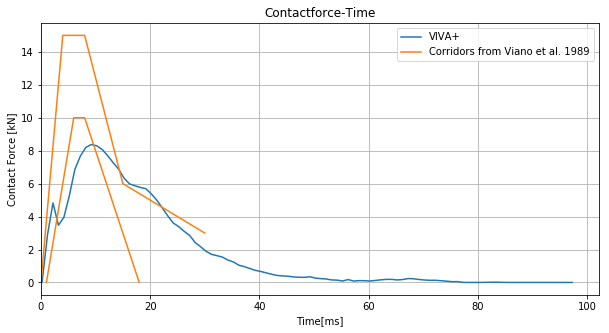

In [8]:
#plot contactforce between impactor and HBM as a function of time together with Viano corridors

#contact_force = data_vis_controller.get_data('IMPACTOR', 'Contactforce-Impactor-to-HBM-m')['Y']

X_Sim_Fig_1 = data_vis_controller.get_data('IMPACTOR', 'Contactforce-Impactor-to-HBM-m')['X']-0.8
Y_Sim_Fig_1 = data_vis_controller.get_data('IMPACTOR', 'Contactforce-Impactor-to-HBM-m')['Y']

X_label = data_vis_controller.get_data('IMPACTOR', 'Contactforce-Impactor-to-HBM-m')['x_name']
Y_label = data_vis_controller.get_data('IMPACTOR', 'Contactforce-Impactor-to-HBM-m')['y_name']

fig1, ax = plt.subplots(figsize=(10,5))
#Plot Simulation Result
ax.plot(X_Sim_Fig_1, Y_Sim_Fig_1, label="VIVA+")


#Plot Corridors from Viano
X_Ref=Ref_time_HS
Y_Ref=Ref_CF_t_HS
ax.plot(X_Ref, Y_Ref, label="Corridors from Viano et al. 1989")


ax.set(xlabel=X_label,ylabel=Y_label,title='Contactforce-Time',xlim=0)
ax.legend()
ax.grid()

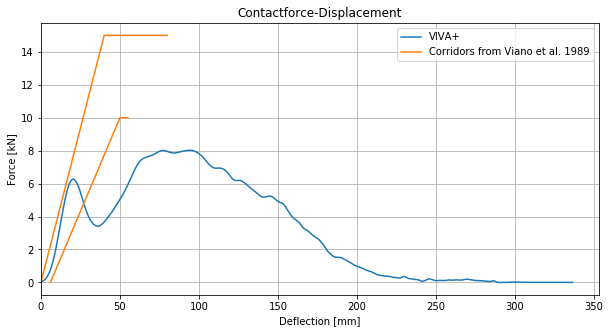

In [9]:
#7 plot contactforce vs. deflection impactor to HBM with viano reference

Impactor_Displacement=data_vis_controller.get_data("IMPACTOR","Impactor_disp_x")["Y"] * -1
Impactor_Force=data_vis_controller.get_data("IMPACTOR","Impactor_acc_x_filter")["Y"] * 23.4

X_Ref=Ref_defl_HS*10
Y_Ref=Ref_CF_d_HS

fig2, ax = plt.subplots(figsize=(10,5))
ax.plot(Impactor_Displacement,Impactor_Force, label="VIVA+")
ax.plot(X_Ref,Y_Ref, label="Corridors from Viano et al. 1989")
ax.set(xlabel='Deflection [mm]',ylabel='Force [kN]',title='Contactforce-Displacement',xlim=0)
ax.legend()
ax.grid()

### Added mass

### Total-, internal-, kinetic-energy vs. time

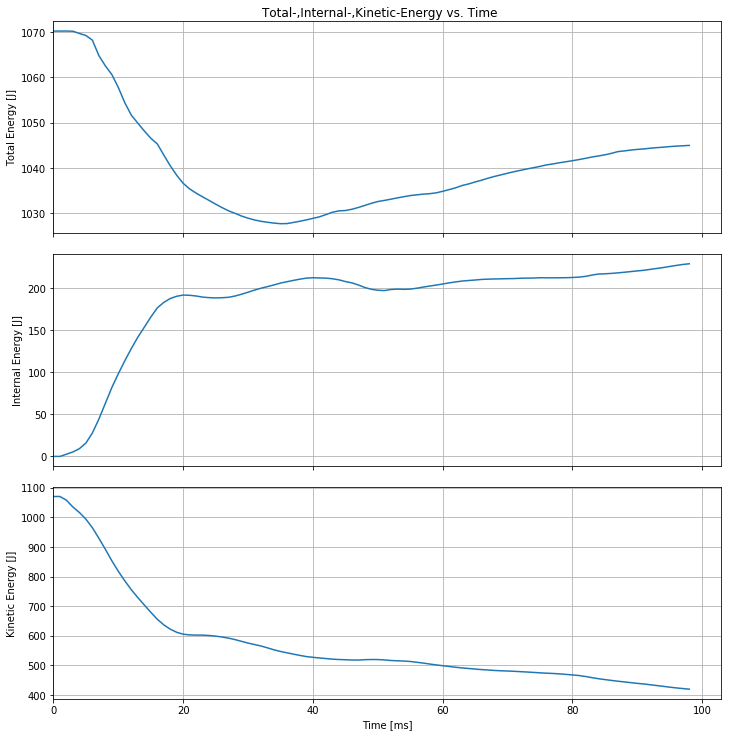

In [10]:
time_ = data_vis_controller.get_data("MODEL","Total_Energy")["X"]
total_energy = data_vis_controller.get_data("MODEL","Total_Energy")["Y"]
internal_energy =data_vis_controller.get_data("MODEL","Internal_Energy")["Y"]
kinetic_energy = data_vis_controller.get_data("MODEL","Kinetic_Energy")["Y"]

fig4, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10,10), sharex=True)
fig4.suptitle('Total-,Internal-,Kinetic-Energy vs. Time',y=1)
fig4.tight_layout()

ax1.plot(time_, total_energy)
ax1.set(ylabel='Total Energy [J]',xlim=0)

ax2.plot(time_, internal_energy)
ax2.set(ylabel='Internal Energy [J]',xlim=0)

ax3.plot(time_, kinetic_energy)
ax3.set(ylabel='Kinetic Energy [J]',xlabel='Time [ms]',xlim=0)

ax1.grid()
ax2.grid()
ax3.grid()
plt.show()

### Internal-, hourglass-energy vs. time

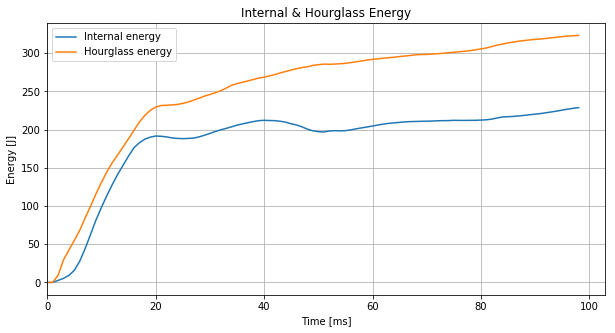

In [11]:
time_ = data_vis_controller.get_data("MODEL","Internal_Energy")["X"]
hourglass_energy = data_vis_controller.get_data("MODEL","Hourglass_Energy")["Y"]


fig5, ax = plt.subplots(figsize=(10,5))# a figure with a single Axes
ax.plot(time_, internal_energy, label="Internal energy")
ax.plot(time_, hourglass_energy, label="Hourglass energy")

ax.set(xlabel='Time [ms]',ylabel='Energy [J]', title='Internal & Hourglass Energy', xlim=0)
ax.grid()
ax.legend()
plt.show()

In [17]:
print(internal_energy)
print(hourglass_energy)
print(hourglass_energy/internal_energy)
print(time_)

[ 3.00000000e-19 -6.35998945e-02  2.57737348e+00  5.27930356e+00
  9.17087610e+00  1.57775308e+01  2.77388873e+01  4.42604841e+01
  6.29567576e+01  8.17603020e+01  9.81613486e+01  1.13579085e+02
  1.28033133e+02  1.41489420e+02  1.53377422e+02  1.65399993e+02
  1.76290555e+02  1.82846634e+02  1.87492270e+02  1.90160313e+02
  1.91614947e+02  1.91285342e+02  1.90482630e+02  1.89155286e+02
  1.88514331e+02  1.88204035e+02  1.88455032e+02  1.88939501e+02
  1.90481902e+02  1.92615070e+02  1.94998072e+02  1.97552590e+02
  1.99720480e+02  2.01628281e+02  2.03661512e+02  2.05833750e+02
  2.07463715e+02  2.09038801e+02  2.10503369e+02  2.11711641e+02
  2.12180957e+02  2.11890696e+02  2.11728279e+02  2.10950637e+02
  2.09678509e+02  2.07638740e+02  2.06055719e+02  2.03583492e+02
  2.00576966e+02  1.98443303e+02  1.97341571e+02  1.96920245e+02
  1.98176178e+02  1.98647470e+02  1.98393869e+02  1.98656252e+02
  1.99721533e+02  2.01073056e+02  2.02294257e+02  2.03476269e+02
  2.04728680e+02  2.06074


# Extracting data with the CriteriaController

## Calculate max. values

In [13]:
crit_controller = CriteriaController(calculation_procedure_def_file=path_to_def, 
                                     object_def_file=path_to_def_id,
                                     data_source=outputfiles)

commands = [{'criteria': 'MODEL_Hourglass_Energy_Max'},
            {'criteria': 'MODEL_Added_Mass_Max'},
            {'criteria': 'IMPACTOR_Contactforce-Impactor-to-HBM-(m-s)_Max'},
            {'criteria': 'MODEL_Hourglass/Internal-Energy_Max'},
            {'criteria': 'MODEL_Percent_Increase_Max'}]

for command in commands:
    crit_controller.calculate(command) 

[READ DYNASAUR DEF]	read C:\Users\klugcor\Documents\Open_VT\intro_exercis\intro-exercise\Postprocessing\Auxilaries\Calculation_Procedures.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read C:\Users\klugcor\Documents\Open_VT\intro_exercis\intro-exercise\Postprocessing\Auxilaries\Objects.def
[READ DYNASAUR DEF]	done
[READ BINOUT]	read glstat data ...
[READ BINOUT]	done reading glstat!
[READ BINOUT]	read rcforc data ...
[READ BINOUT]	done reading rcforc!
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[DATA]	read id 9900011m from channel name: x_force
[DATA]	read id 9900011m from channel name: y_force
[DATA]	read id 9900011m from channel name: z_force
[DATA]	read id 9900011s from channel name: x_force
[DATA]	read id 9900011s from channel name: y_force
[DATA]	read id 9900011s from channel name: z_force
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_e

## Visualize max. values as table 

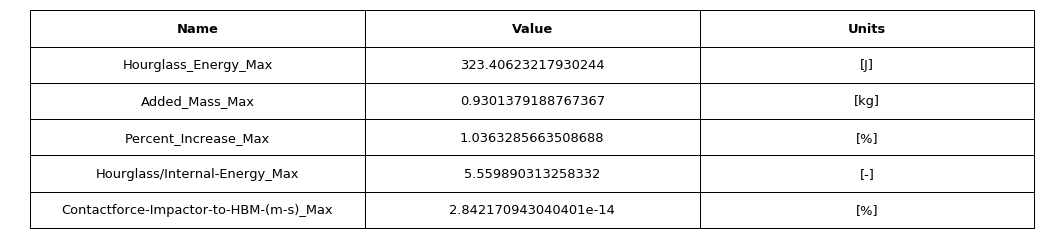

In [14]:
d = crit_controller.get_data()
col_labels = ["Name", "Value", "Units"]
criteria_table =  []

for part_of in d.keys():
    for crit_type in d[part_of].keys():
        for criteria in d[part_of][crit_type].keys():
            criteria_table.append([criteria, d[part_of][crit_type][criteria]["Value"]])

units = ['[J]','[kg]','[%]','[-]','[%]']
for criteria, unit in zip(criteria_table, units):
    criteria.append(unit)
    

fig6, ax = plt.subplots()

ax.axis('off')
bbox = [0, 0, 3, 1]
mpl_table = ax.table(cellText = criteria_table, bbox = bbox, colLabels = col_labels, cellLoc='center')
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(13)
mpl_table[0,0].get_text().set_weight('bold')
mpl_table[0,1].get_text().set_weight('bold')
mpl_table[0,2].get_text().set_weight('bold')           

## Save figures as "Charts.pdf" in the output directory 

In [18]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages(os.path.join(output_dir, 'Charts.pdf')) as pdf:
    pdf.savefig(fig1, bbox_inches='tight')
    pdf.savefig(fig2,bbox_inches='tight')
    #pdf.savefig(fig3,bbox_inches='tight')
    pdf.savefig(fig4,bbox_inches='tight')
    pdf.savefig(fig5,bbox_inches='tight')
    pdf.savefig(fig6,bbox_inches='tight')
    plt.close()